In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
slice_df = pd.read_csv('../slice_df.csv')
slice_df['lineages'] = slice_df['lineages'].astype(int)
slice_df['tree_idx'] = slice_df['tree_idx'].astype(int)

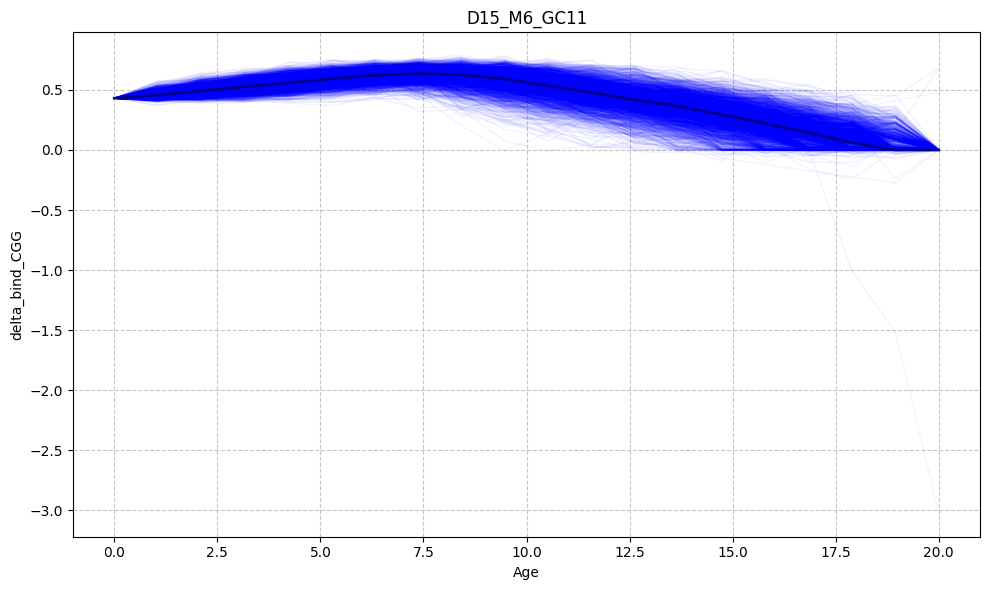

In [ ]:
df = slice_df.copy()

first_uid = df['uid'].iloc[0]
first_uid_data = df[df['uid'] == first_uid]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique tree_idx values
unique_trees = first_uid_data['tree_idx'].unique()

# Plot one light line per tree_idx
for tree_idx in unique_trees:
    tree_data = first_uid_data[first_uid_data['tree_idx'] == tree_idx]
    ax.plot(tree_data['age'], tree_data['delta_bind_CGG'], 
            alpha=0.05, linewidth=1, color='blue')

# Add a thicker line for the mean across all tree_idx values, if desired
grouped = first_uid_data.groupby('age')['delta_bind_CGG'].median().reset_index()
ax.plot(grouped['age'], grouped['delta_bind_CGG'], 
        color='darkblue', linewidth=2, linestyle='-')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('delta_bind_CGG')
ax.set_title(f'{first_uid}')

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
# print out delta_bind_CGG for first_uid_data restricted to age == 20 
first_uid_data[ first_uid_data['age'] == 20 ][['delta_bind_CGG', 'tree_idx']]

,delta_bind_CGG,tree_idx
19,0.0,500
39,0.0,501
59,0.0,502
79,0.0,503
99,0.0,504
...,...,...
39919,0.0,2495
39939,0.0,2496
39959,0.0,2497
39979,0.0,2498
